# Google Play App Analysis

1. Pick an application from Google Play store with at least 1,000 reviews.
    - (ex) https://play.google.com/store/apps/details?id=com.teamviewer.pilot&hl=en_US&gl=US
2. Crawl review data including USER, DATE, RATING, and TEXT.
3. Tell us about pros and cons about the application based on users’ reviews.
4. Run LDA topic modeling and try to find insights from modeling.
5. Visualize your work.

## Packages installation

```
pandas matplotlib seaborn
```

```
pip install nltk spacy
python -m spacy download en
```

## Data Collecting

- Collected 25,000 reviews from [zoom application](https://play.google.com/store/apps/details?id=us.zoom.videomeetings&hl=en_US&gl=US)
- Codes are in `./src/collector.py`

## Pros and Cons

In [124]:
import spacy
from spacy import displacy

import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from pathlib import Path
import pickle

from gensim.models import TfidfModel, Word2Vec, FastText
from gensim.corpora import Dictionary

from typing import List, Tuple, Union

In [2]:
data_path = Path("./data")
df = pd.read_csv(data_path / "reviews.tsv", sep="\t", encoding="utf-8")

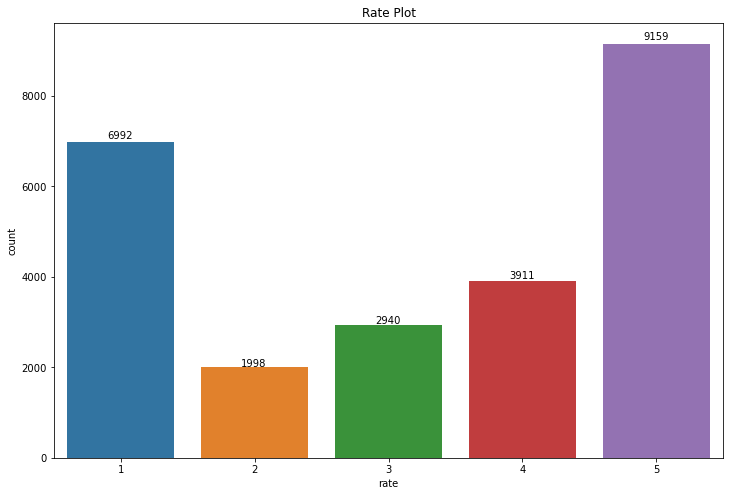

In [3]:
rate_size = df.pivot_table(index="rate",aggfunc="size")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(x="rate", data=df, ax=ax)
ax.set_title("Rate Plot")
for i, rate in enumerate(rate_size, 1):
    ax.text(i-1-0.1, rate+rate*0.01, s=f"{rate}")
plt.show()

If we want to see the application's pros and cons, we need to know what people are thinking about this app. 

2 approaches

1. sentimental analysis
    - good or bad 
2. word2vec clustering
    - what kind of words people are talking

In [27]:
# pipeline = ["tokenizer", "tagger", "lemmatizer", ""]
spacy_nlp = spacy.load("en_core_web_sm")

In [52]:
with (data_path / "tkns.pickle").open("wb") as file:
    pickle.dump(list(df["text"].apply(spacy_nlp)), file)

In [55]:
with (data_path / "tkns.pickle").open("rb") as file:
    doc_data = pickle.load(file)

In [100]:
get_info = lambda x: (x.lower_, x.lemma_.lower(), x.pos_, x.tag_, x.is_stop)

def preprocessing(txt: spacy.tokens.doc.Doc):
    # tokenize & remove punctuations
    # didn't used stop words, since words like 'but' is important to know how people think about app
    tkns = [get_info(tkn) for tkn in txt if tkn.tag_ not in [",", ".", "PUNCT"]]
    return tkns

In [101]:
tkns = []
for text in tqdm(doc_data, total=len(doc_data), desc="preprocessing"):
    tkns.append(preprocessing(text))

preprocessing:   0%|          | 0/25000 [00:00<?, ?it/s]

In [120]:
def join_tkn_func(x: tuple, idx1: int, idx2: int):
    """
    idx1: token(0) or lemma token(1)
    idx2: pos(2) or tag(3)
    
    - pos: coarse-grained tags, https://universaldependencies.org/docs/u/pos/
    - tag: fine-grained part-of-speech tags
    """
    return f"{x[idx1]}__{x[idx2]}"

def save2documents(tkns: List[Tuple[str]], sv_path: Union[str, Path], idx1: int, idx2: int):
    """
    tkns: list of tuple tokens, (token, lemma, pos, tag, is_stop)
    filename: save filename
    idx1: token(0) or lemma token(1)
    idx2: pos(2) or tag(3)
    
    - pos: coarse-grained tags, https://universaldependencies.org/docs/u/pos/
    - tag: fine-grained part-of-speech tags
    """
    sv_path = Path(sv_path)
    filename = sv_path.name
    with (data_path / filename).open("w", encoding="utf-8") as file:
        for doc in tqdm(tkns, total=len(tkns), desc=f"processing: {filename}"):
            print(" ".join([join_tkn_func(tkn, idx1, idx2) for tkn in doc]), file=file)

In [121]:
save2documents(tkns, "./data/token_pos.txt", 0, 2)
save2documents(tkns, "./data/token_tag.txt", 0, 3)
save2documents(tkns, "./data/lemma_pos.txt", 1, 2)
save2documents(tkns, "./data/lemma_tag.txt", 1, 3)

processing: token_pos.txt:   0%|          | 0/25000 [00:00<?, ?it/s]

processing: token_tag.txt:   0%|          | 0/25000 [00:00<?, ?it/s]

processing: lemma_pos.txt:   0%|          | 0/25000 [00:00<?, ?it/s]

processing: lemma_tag.txt:   0%|          | 0/25000 [00:00<?, ?it/s]

## Count Based

what people are mostly talking about this app by rating

In [125]:
def load_data(path: Union[str, Path]):
    path = Path(path)
    with path.open("r", encoding="utf-8") as file:
        data = [line.strip() for line in file.readlines()]

In [ ]:
# token_pos
Path()

In [ ]:
TfidfModel()

## Vector Based

In [ ]:
from gensim.models import Word2Vec, FastText
model = Word2Vec(sentences, size=300, window=5, min_count=1, workers=1)